# Cat and Dog Classifier

In [4]:
#important libraries

import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
cd '/content/drive/MyDrive/Dog and Cat dataset'

/content/drive/MyDrive/Dog and Cat dataset


In [15]:
#set path of the dataset

cat_images_path = "/content/drive/MyDrive/Dog and Cat dataset/Cat"
dog_images_path = "/content/drive/MyDrive/Dog and Cat dataset/Dog"

In [16]:
print("Number of cat Images: ", len(os.listdir(cat_images_path)))
print("Number of Dog Images: ", len(os.listdir(dog_images_path)))

Number of cat Images:  500
Number of Dog Images:  500


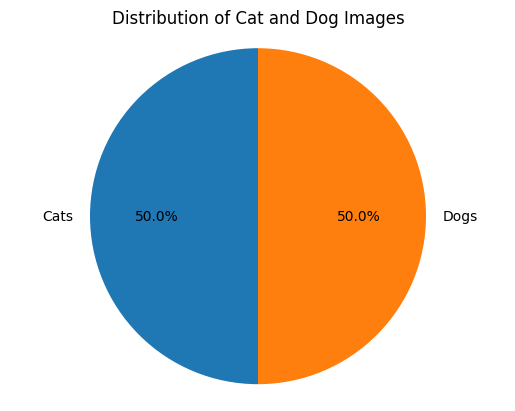

In [17]:
# Get the number of cat and dog images
num_cats = len(os.listdir(cat_images_path))
num_dogs = len(os.listdir(dog_images_path))

# Create the labels and sizes for the pie chart
labels = ['Cats', 'Dogs']
sizes = [num_cats, num_dogs]

# Create the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Cat and Dog Images')
plt.show()


In [18]:
# constant image size
image_size = (180, 180)
image_width, image_height = image_size

In [14]:
# Function to read images and create a numpy arrays

def load_images_from_folder(folder_path, label):
  images =[]
  labels = []
  for filename in os.listdir(folder_path):
    img_path = os.path.join(folder_path, filename)
    img = Image.open(img_path).convert('RGB')
    img = img.resize(image_size)
    img_array = np.array(img)
    images.append(img_array)
    labels.append(label)

  return images, labels

In [19]:
# loading cat and dog images

cat_images, cat_labels = load_images_from_folder(cat_images_path, 0)          # 0 label for cat
dog_images, dog_labels = load_images_from_folder(dog_images_path, 1)          # 1 label for dog

# Combine data
X = np.array(cat_images + dog_images)
y = np.array(cat_labels + dog_labels)